In [ ]:
# Importing the pandas library and aliasing it as 'pd'
import pandas as pd
# Importing the numpy library and aliasing it as 'np'
import numpy as np

In [ ]:
# Importing the drive module from the google.colab library
from google.colab import drive
# Mounting Google Drive to the '/content/drive' directory
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Reading a CSV file from a specific path in Google Drive and storing it in the 'df' DataFrame
df = pd.read_csv('/content/drive/MyDrive/CSE445/diabetes.csv')

In [ ]:
# Displaying the first few rows of the DataFrame 'df' to get a quick overview of the data
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# Calculating the sum of missing values for each column in the DataFrame 'df'
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

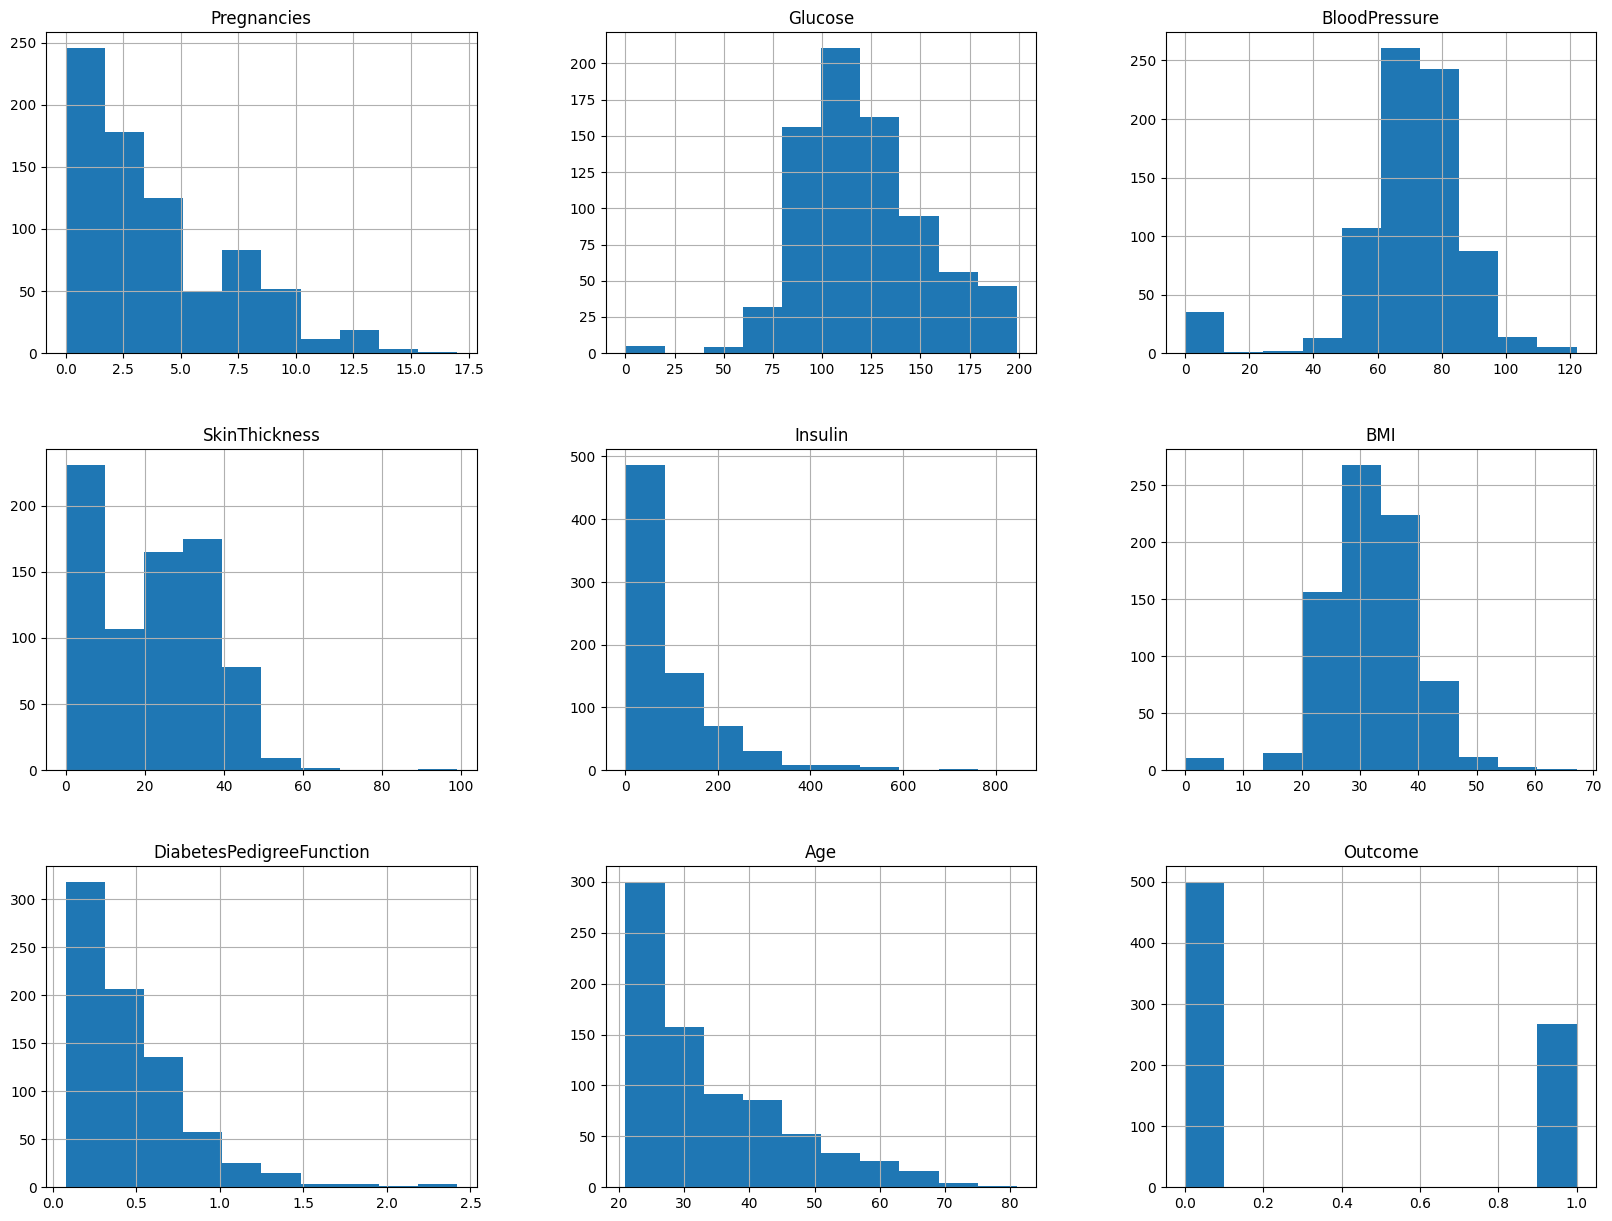

In [ ]:
# This creates visualizations (histograms) to display the distribution of values in each column of the DataFrame.
df.hist( figsize= (20,15) )

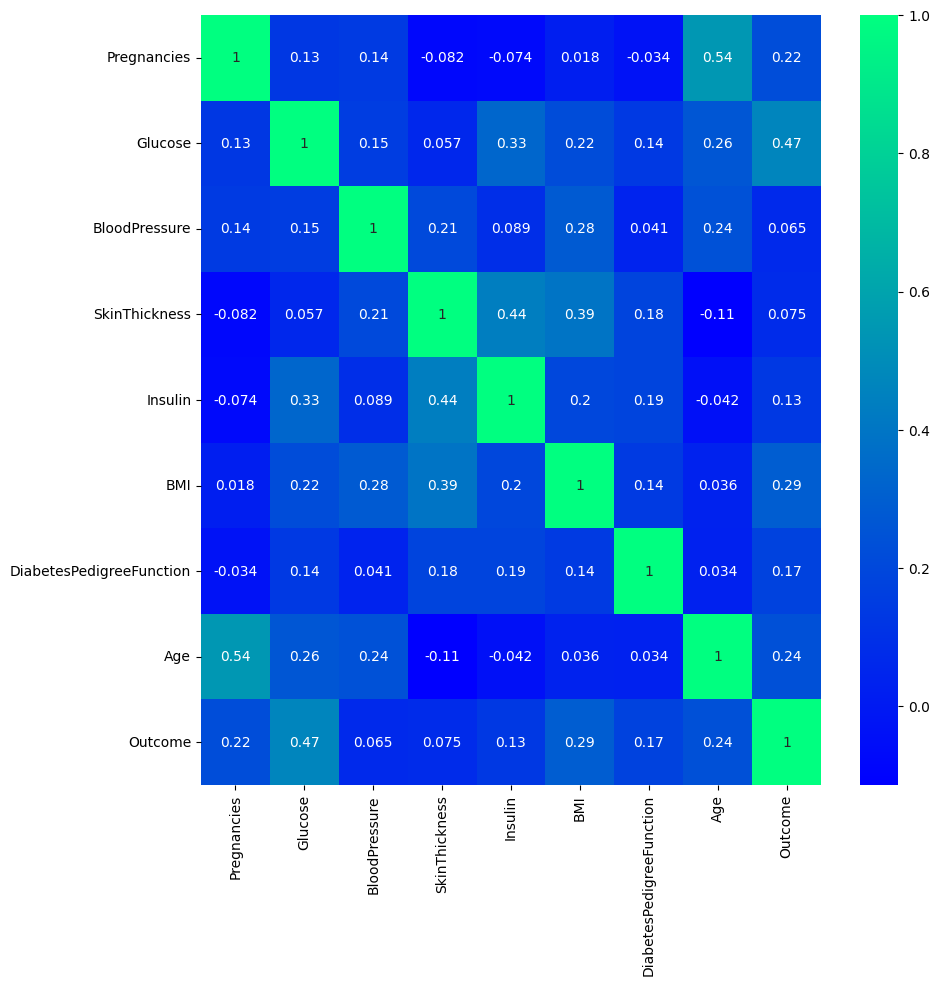

In [ ]:
# Importing necessary libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
# Creating a subplot with a specified figure size
fig, ax = plt.subplots(figsize=(10,10))
# Generating a heatmap of the correlation matrix for the DataFrame 'df'
# The 'annot' parameter adds numeric annotations to the heatmap, and 'cmap' sets the color map.
sns.heatmap(df.corr(), annot= True, cmap='winter')
# This code creates a heatmap to visualize the correlation matrix of the numerical columns in the DataFrame 'df'.
plt.show()

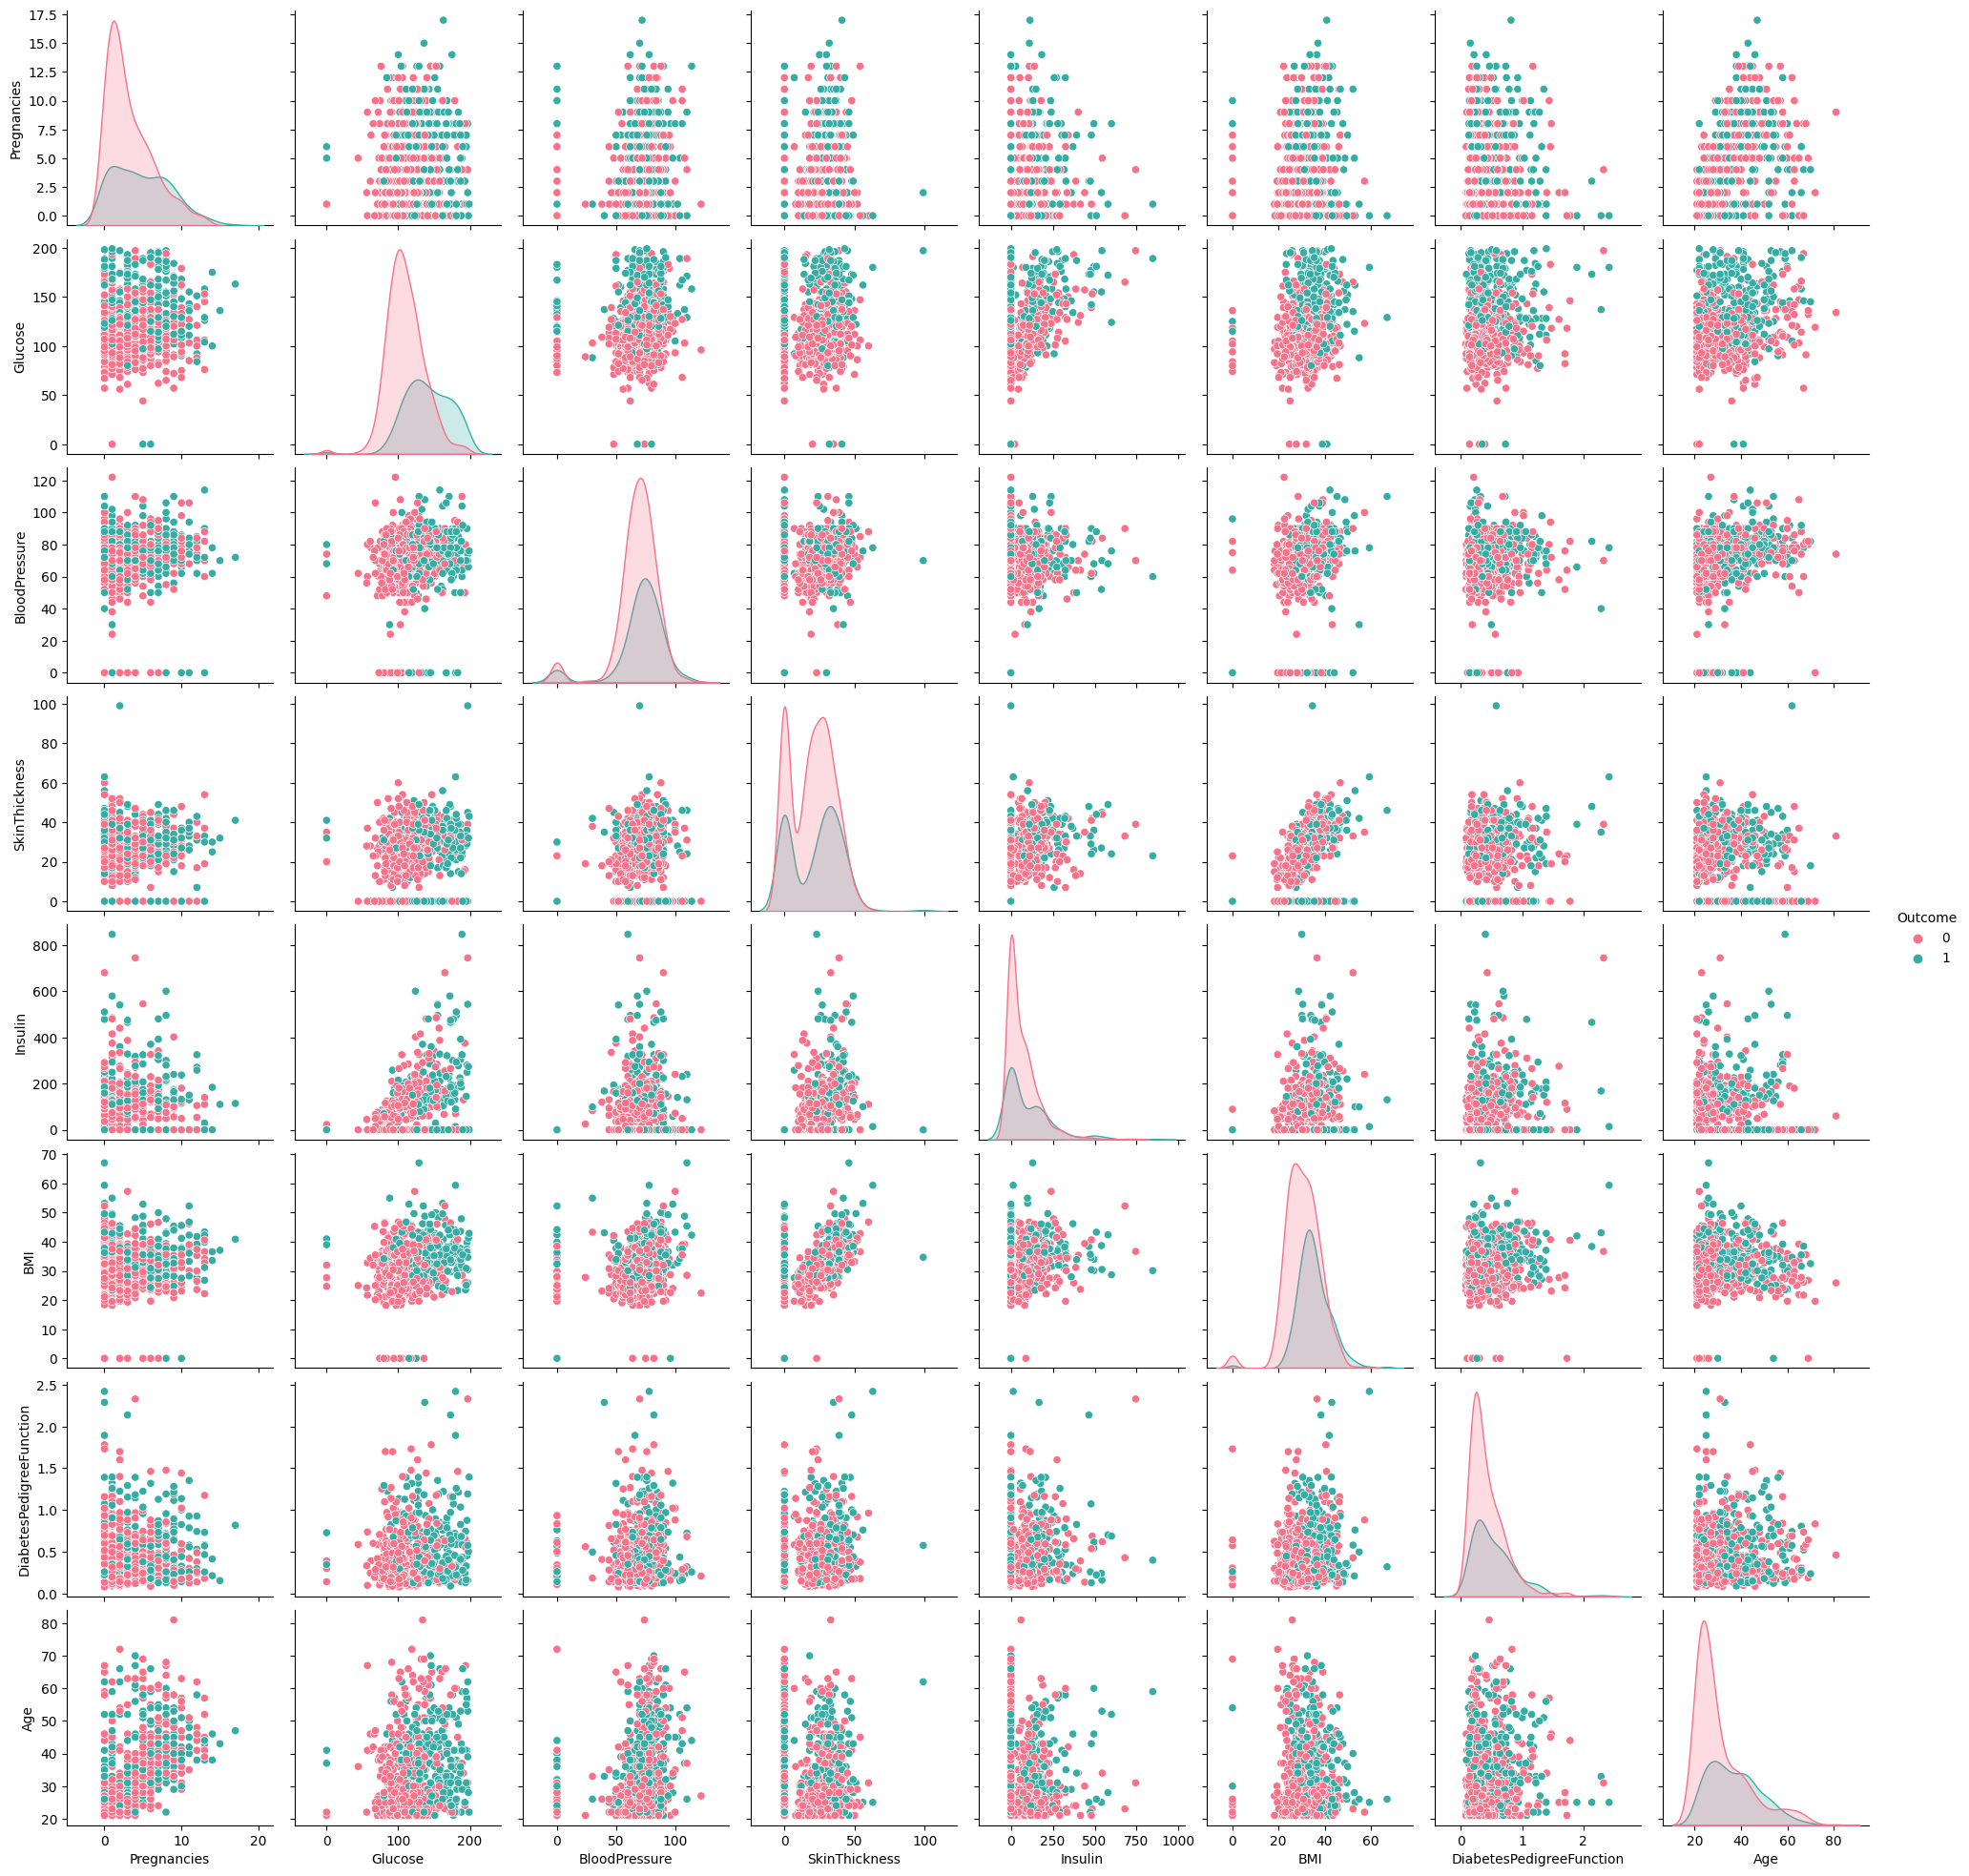

In [ ]:
# Creating a pairplot to visualize relationships between pairs of variables in the DataFrame 'df'
# The 'hue' parameter colors the plot points based on the 'Outcome' column, and 'palette' sets the color scheme.
sns.pairplot(df, hue='Outcome', palette="husl")

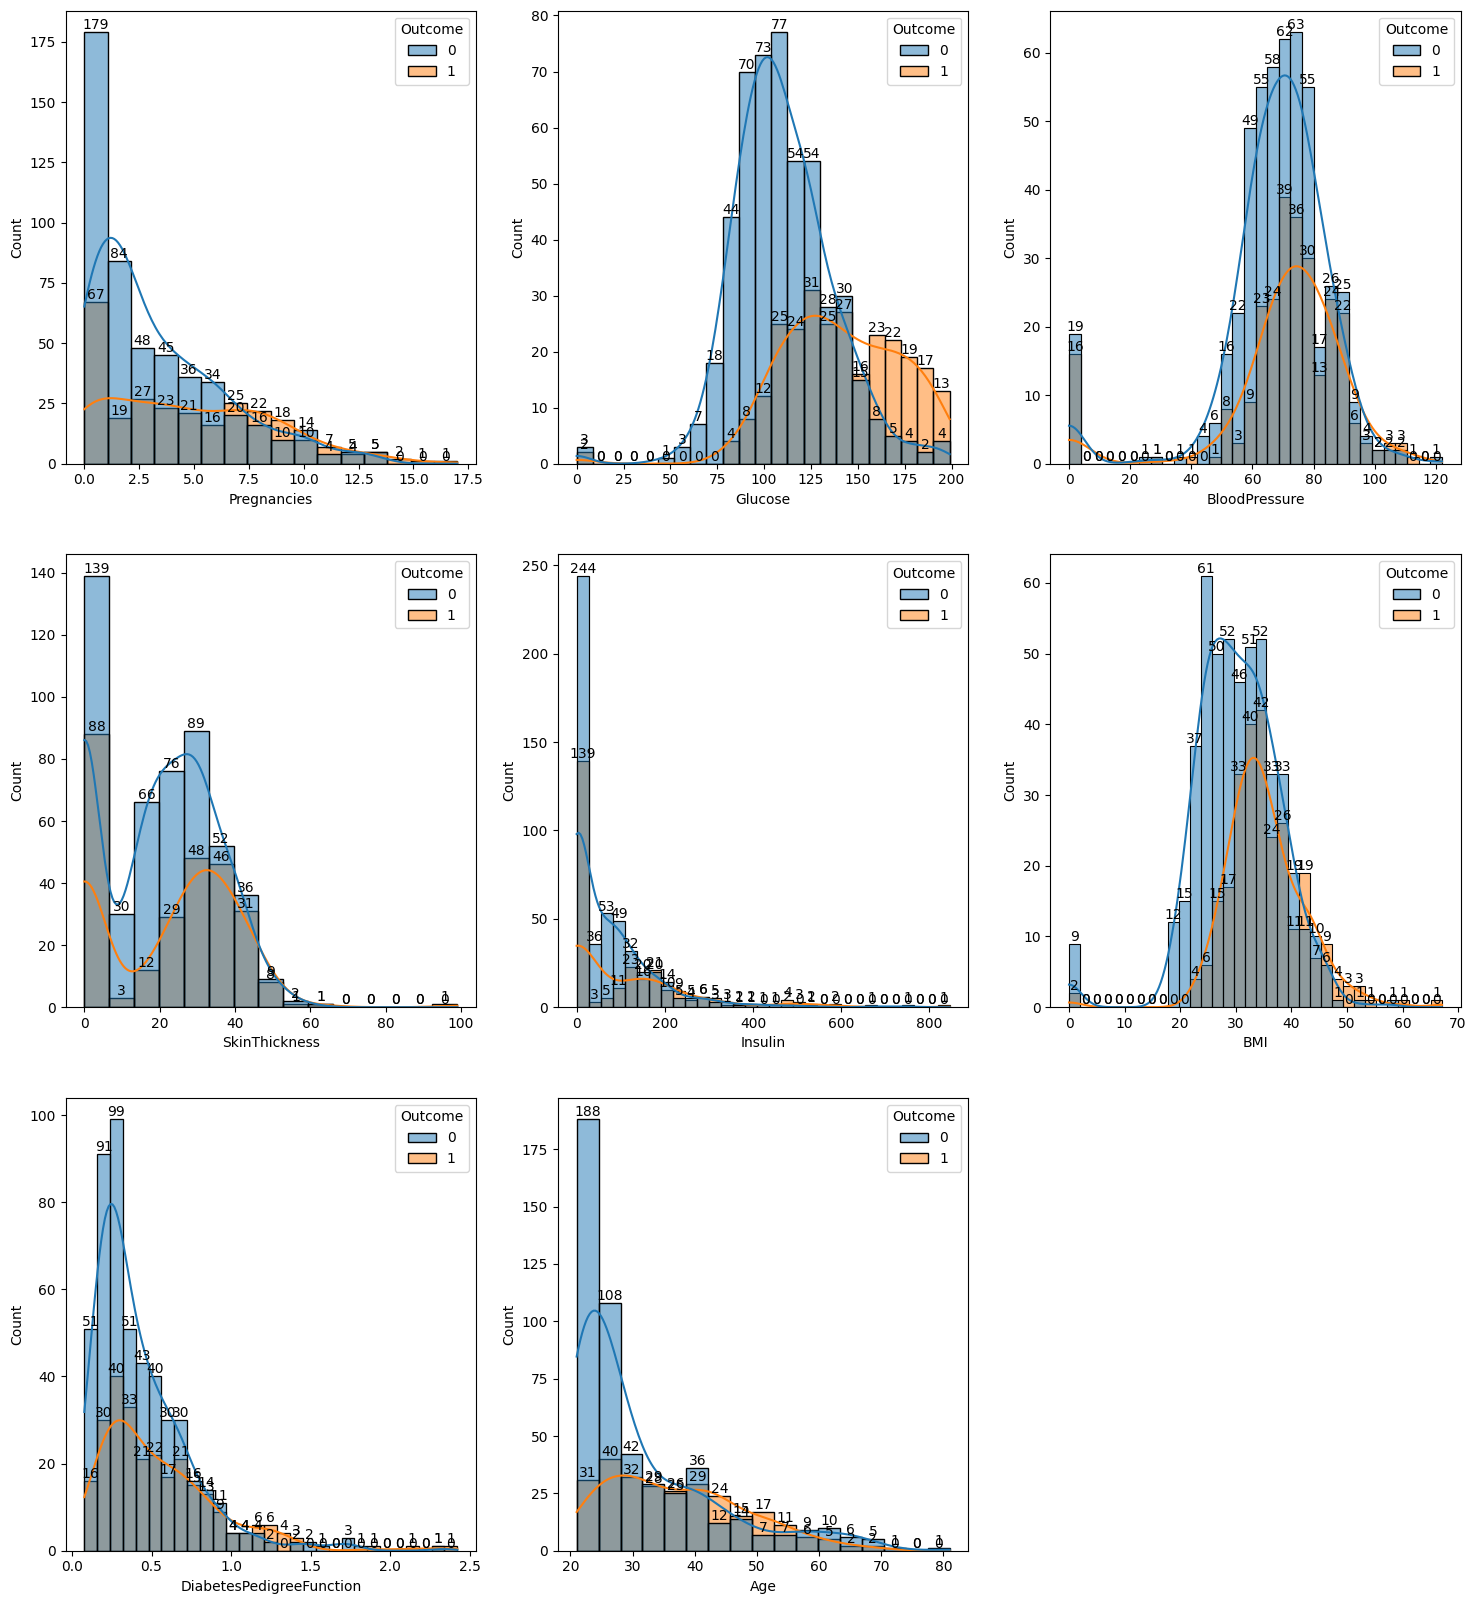

In [ ]:

pno = 1
# Creating a figure with a specified size
plt.figure(figsize=(18,20))
# Iterating through each column in the DataFrame 'df' to create subplots
for i in df.columns:
  # Checking if the plot number is less than 9
        if pno<9:
          # Creating subplots in a 3x3 grid
            plt.subplot(3,3,pno)
            # Creating a histogram with kernel density estimation (kde) for the column 'i' with hue based on 'Outcome'
            ax = sns.histplot(data = df , x = i , hue = df.Outcome , kde = True);
            # Adding xlabel to the subplot
            plt.xlabel(i)
            # Incrementing the plot number
            pno+=1
            # Adding labels on top of the bars in the histogram
            for i in ax.containers:
                ax.bar_label(i,)

In [ ]:
# Creating feature matrix X by dropping the 'Outcome' column from the DataFrame 'df'
X=df.drop('Outcome',axis=1)
# Creating target variable y by selecting the 'Outcome' column from the DataFrame 'df'
y=df['Outcome']
# Printing the target variable y
print(y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [ ]:
# Importing the StandardScaler from scikit-learn
from sklearn.preprocessing import StandardScaler
# Creating an instance of StandardScaler
scaler_S = StandardScaler()
# Scaling the feature matrix X using the fit_transform method
data_S = scaler_S.fit_transform(X)
# Creating a DataFrame 'scaler_data_S' with the scaled data and column names from X
scaler_data_S = pd.DataFrame(data_S,columns=X.columns)
# Displaying the first few rows of the scaled data
scaler_data_S.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


In [ ]:
# Importing the train_test_split function from scikit-learn
from sklearn.model_selection import train_test_split
# This code splits the data into training and testing sets, commonly used in machine learning to evaluate model performance.
X_train,X_test,Y_train,Y_test=train_test_split(scaler_data_S,y,test_size=0.20,random_state=10)

In [ ]:
# Importing necessary libraries for machine learning
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import mutual_info_classif
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV

# Support Vector Machine (SVM) with hyperparameter tuning using GridSearchCV
# Defining the parameter grid for hyperparameter tuning
param_grid = {'C': [0.1,1.1,1,100],
              'gamma': [1,.80,.56,0.245,0.75],
              'kernel': ['rbf','poly','linear']}
# Creating a GridSearchCV object with SVC as the estimator, the parameter grid, and refit set to True
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
# Fitting the model using the standardized feature matrix 'scaler_data_S' and target variable 'y'
grid.fit(scaler_data_S, y)
# Displaying the best hyperparameters found by GridSearchCV
grid.best_params_

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.649 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.649 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.649 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.654 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.654 total time=   0.0s
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.688 total time=   0.1s
[CV 2/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.727 total time=   0.1s
[CV 3/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.682 total time=   0.2s
[CV 4/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.739 total time=   0.2s
[CV 5/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.739 total time=   0.1s
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.753 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear

{'C': 1.1, 'gamma': 1, 'kernel': 'linear'}

In [ ]:
# Importing necessary libraries for model evaluation
from sklearn.metrics import confusion_matrix ,classification_report
from sklearn.svm import SVC
# Creating an SVM classifier with the 'rbf' kernel and specified hyperparameters
SVM_rbf = SVC(kernel = 'rbf',random_state=100 , gamma=0.245 ,C=1.1)
# Training the SVM classifier using the training data
SVM_classifier = SVM_rbf.fit(X_train , Y_train)
# Making predictions on the test data
SVM_predicion = SVM_classifier.predict(X_test) #predict

# Evaluating the performance of the SVM classifier
# Confusion Matrix
CM=confusion_matrix(Y_test,SVM_predicion)
print("Confusion Matrix:\n",CM)
# Classification Report
CR=classification_report(Y_test,SVM_predicion)
print("Performance:\n",CR)

Confusion Matrix:
 [[84 11]
 [33 26]]
Performance:
               precision    recall  f1-score   support

           0       0.72      0.88      0.79        95
           1       0.70      0.44      0.54        59

    accuracy                           0.71       154
   macro avg       0.71      0.66      0.67       154
weighted avg       0.71      0.71      0.70       154



In [ ]:
# Importing necessary libraries for evaluating the Receiver Operating Characteristic (ROC) curve
from sklearn import metrics
# Calculating the False Positive Rate (fpr), True Positive Rate (tpr), and thresholds for the ROC curve
fpr, tpr, threshold = metrics.roc_curve(Y_test,  SVM_predicion)

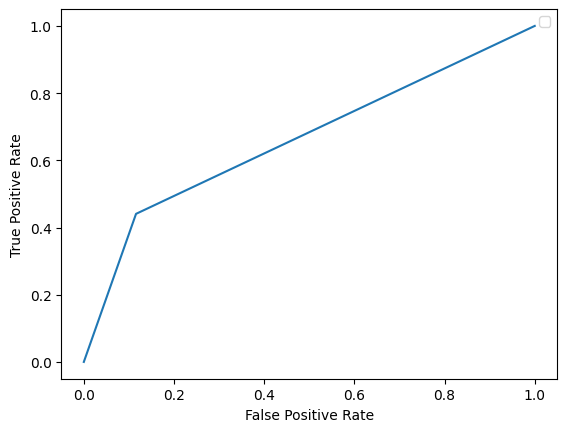

In [ ]:
# Plotting the Receiver Operating Characteristic (ROC) curve
plt.plot(fpr,tpr)
# Adding labels to the axes
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
# Displaying a legend (if applicable)
plt.legend()
# Showing the plot
plt.show()

In [ ]:
# Importing necessary libraries for machine learning
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix ,classification_report


# Defining the hyperparameter grid for Random Forest Classifier
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


# Creating a Random Forest Classifier with a fixed random state
random_forest_classifier = RandomForestClassifier(random_state=42)
# Performing GridSearchCV to find the best hyperparameters for the Random Forest Classifier
grid_search = GridSearchCV(random_forest_classifier, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
# Fitting the model using the training data
grid_search.fit(X_train, Y_train)

# Displaying the best hyperparameters found by GridSearchCV
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Getting the best Random Forest model
best_random_forest = grid_search.best_estimator_
# Making predictions on the test data
random_predict = best_random_forest.predict(X_test)

# Evaluating the performance of the Random Forest Classifier
# Confusion Matrix
random_validate = confusion_matrix(Y_test, random_predict)
print("Confusion Matrix:")
print(random_validate)
# Classification Report
random_classification_report = classification_report(Y_test, random_predict)
print("Classification Report:")
print(random_classification_report)

Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Confusion Matrix:
[[88  7]
 [31 28]]
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.93      0.82        95
           1       0.80      0.47      0.60        59

    accuracy                           0.75       154
   macro avg       0.77      0.70      0.71       154
weighted avg       0.76      0.75      0.74       154



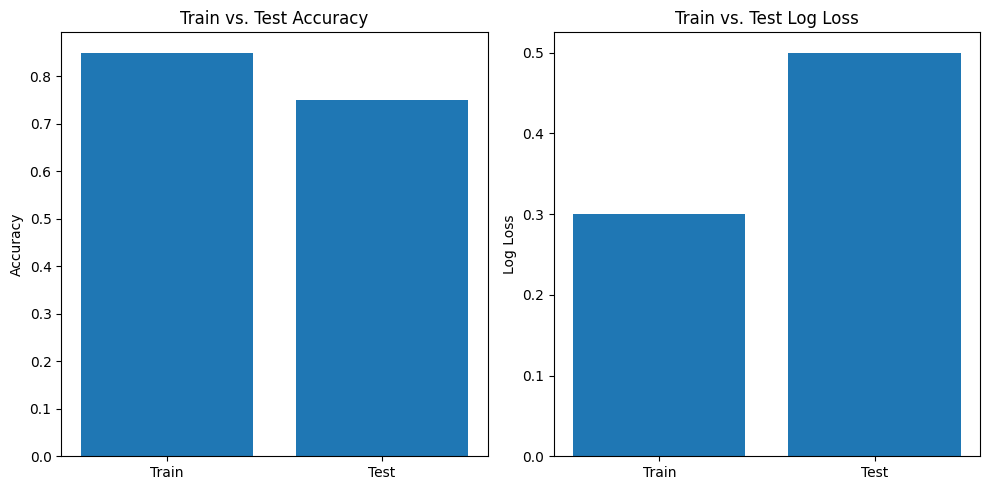

In [ ]:
import matplotlib.pyplot as plt

train_accuracy = 0.85
test_accuracy = 0.75
train_loss = 0.3
test_loss = 0.5

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Bar plot for accuracy
axs[0].bar(["Train", "Test"], [train_accuracy, test_accuracy])
axs[0].set_ylabel("Accuracy")
axs[0].set_title("Train vs. Test Accuracy")

# Bar plot for log loss
axs[1].bar(["Train", "Test"], [train_loss, test_loss])
axs[1].set_ylabel("Log Loss")
axs[1].set_title("Train vs. Test Log Loss")

plt.tight_layout()
plt.show()